In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import math
from datetime import datetime, date
import seaborn as sns
import ppscore as pps
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import requests
import pandas as pd
import json
import re
from pandas import concat

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [185]:
url = "C:/Users/liron/OneDrive - Ariel University/Toar 1/third year/Yeda&Netunim/Jupyter/output_all_students_Train_v10.xlsx"
data = pd.read_excel(url)

In [186]:
data

,City,type,room_number,Area,Street,number_in_street,city_area,price,num_of_images,floor_out_of,...,hasStorage,condition,hasAirCondition,hasBalcony,hasMamad,handicapFriendly,entranceDate,furniture,publishedDays,description
0,פתח תקווה,דירה,5.5,137,רפאלי שרגא,3,אם המושבות החדשה,3600000,6.0,קומה 11 מתוך 19,...,False,שמור,True,False,True,True,גמיש,לא צויין,7,"למכירה 5.5 חדרים ענקית, מרווחת , מוארת , קומה ..."
1,פתח תקווה,דירה,3,84,כצנלסון אהרון,6,נווה גן,2550000,6.0,קומה 6 מתוך 9,...,True,שמור,True,False,True,False,מיידי,לא צויין,8,"למכירה מפרטי ברחוב אהרון כצנלסון השקט והמבוקש,..."
2,פתח תקווה,דירה,4,120,הירקונים,17,קרית הרב סלומון,2650000,10.0,קומה 2 מתוך 7,...,True,חדש,True,True,True,False,גמיש,חלקי,6,פריים לוקשיין בשכונת שיפר המאוד מבוקשת!!! למכי...
3,פתח תקווה,דירה,3.5,110,סלנט שמואל,56,המרכז השקט,2450000,8.0,קומה 2 מתוך 6,...,False,משופץ,True,False,True,True,גמיש,חלקי,8,"בפתח תקווה ברחוב שמואל סלנט המבוקש,לא כדאי לפס..."
4,פתח תקווה,דירה,4.5,120,בן צבי יצחק,28,כפר גנים ב,2720000,9.0,קומה 3 מתוך 6,...,False,משופץ,True,True,True,True,גמיש,לא צויין,21,"הדירה משופצת חלקית בטעם טוב , פונה לעורף לכיוו..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,רעננה,בית פרטי,9.5 חד׳,"350 מ""ר",הורד,35,2005,8200000,NaN,קומה 4 מתוך 4,...,יש מחסן,שמור,יש מיזוג אויר,יש מרפסת,יש ממ״ד,לא נגיש לנכים,גמיש,אין,NaN,"בית גדול מאוד , 3 כיווני אוויר , 2 מרפסות גדולות"
695,רעננה,דירה,4 חד׳,"110 מ""ר",קזן,NaN,מרכז דרום,3350000,6.0,קומה 4 מתוך 6,...,יש מחסן,חדש,יש מיזוג אויר,יש מרפסת,יש ממ״ד,נגיש לנכים,גמיש,לא צויין,NaN,"בקומה 4 הדירה 110 מ""ר נטו136 מ""ר ארנונה.מעוצבת..."
696,רעננה,קוטג',7 חד׳,"376 מ""ר",הטללים,NaN,קרית גנים,8500000,13.0,קומת קרקע,...,אין מחסן,חדש,אין מיזוג אויר,אין מרפסת,אין ממ״ד,לא נגיש לנכים,2023-08-01 00:00:00,לא צויין,NaN,במערב המבוקש! !ה---- בית הנדיר הזה הוא עוד אחד...
697,רעננה,דירה,5 חד׳,"126 מ""ר",אחד העם,NaN,לסטר,3850000,NaN,קומה 5 מתוך 7,...,אין מחסן,חדש,יש מיזוג אויר,יש מרפסת,יש ממ״ד,נגיש לנכים,מיידי,לא צויין,NaN,דירה חדשה מהקבלן באזור מבוקש .\n5 חדרים .מרווח...


## EDA

### price column

In [260]:
data = data.dropna(subset=['price']).copy()
data = data[data['price'].apply(lambda x: bool(re.search(r'\d', str(x))))]
data['price'] = data['price'].apply(lambda x: str(x).replace(',', ''))
data['price'] = data['price'].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else print(x))
data['price'] = data['price'].apply(lambda x: float(x) if isinstance(x, str) and x.isdigit() else None)
data = data.dropna(subset=['price']).copy()

In [169]:
data[data['City']=="ירושלים"]
# מחיר קיצוני שמגדיל את הערכים של המחיר
data = data.drop(153)

ניצור העתק של דאטה מסודר למספרים נומריים כדי לבדוק האם יש משתנים תלויים וכך לא ניגע בדאטה המקורית

In [103]:
data_copy = data.copy()

### Area column

In [81]:
data_copy['Area'] = data_copy['Area'].apply(lambda x: int(re.findall('[0-9]+',str(x))[0]) if re.findall('[0-9]+',str(x)) else None)

בדיקת מולטיקולינריטי בין עמודות

In [27]:
def convert_to_binary(x):
    x = str(x)
    if (re.search("^יש", x) is not None) or (re.search("^כן", x) is not None) or (x == "yes") or (x == "True") or (re.search("^נגיש", x) is not None):
        return 1
    elif (re.search("^משופץ", x) is not None) or (re.search("^חדש", x) is not None) or (re.search("^שמור", x) is not None):
        return None
    else:
        return 0
    
#---------------------------------------------------------------------------------------------------------------------------  
def to_room_num(x):
    if re.findall('[0-9]+.[0-9]+',str(x)):
        return float(re.findall('[0-9]+.[0-9]+',str(x))[0])
    if re.findall('[0-9]+',str(x)):
        return float(re.findall('[0-9]+',str(x))[0])
    elif isinstance(x, list):
        if re.findall('[0-9]+.[0-9]+',str(x[0])):
            return float(re.findall('[0-9]+.[0-9]+',str(x[0])))
        else:
            return float(re.findall('[0-9]+',str(x))[0])
    else:
        return None
    
#--------------------------------------------------------------------------------------------------------------------------- 
def to_other_type(x):
    if x=="בניין" or x=="מיני פנטהאוז" or x=="מגרש" or x=="קוטג' טורי" or x=="דירת נופש" or x=="אחר" or x=="טריפלקס" or x=="נחלה" :
        return "other"
    elif re.findall('קוטג',str(x)):
        return "קוטג"
    else:
        return x
    
#--------------------------------------------------------------------------------------------------------------------------- 
def calculate_entrance_date(date):
    if re.findall('מיידי',str(date)):
        return "less_than_6 months"
    
    elif re.findall('גמיש',str(date)):
        return "flexible"
    elif re.findall('לא צויין',str(date)):
        return "not_defined"
    else:

        date = pd.to_datetime(date)
#         today = date.today()
        today = pd.to_datetime('today')
        date_difference = date - today 
#         Calculate the difference between the two dates
#         date_difference =data-today 
#         Extract the number of days difference
        days_difference = date_difference.days
        if days_difference<182:
            return 'less_than_6 months'
        elif days_difference>182 and days_difference<365:
            return "months_6_12"
        else:
            return "above_year"
#--------------------------------------------------------------------------------------------------------------------------- 
        
def to_condition(x):
    if x=="מיידי" or x=="גמיש" or x == False or x=="לא צויין" or x=='None' or x is np.nan:
        return "לא צויין"
    elif x=="ישן" or  x=="דורש שיפוץ":
        return "ישן"
    elif re.findall('חדש',str(x)):
        return "חדש"
    else:
        return x
    
def total_floor(x):
    if re.findall('[0-9]+',str(x)):
        if len(re.findall('[0-9]+',str(x)))==2:
            if float(re.findall('[0-9]+',str(x))[1]) == 0:
                return float(re.findall('[0-9]+',str(x))[0])
            else:
                return float(re.findall('[0-9]+',str(x))[1])
        elif len(re.findall('[0-9]+',str(x)))==1:
            return float(re.findall('[0-9]+',str(x))[0])
    elif re.findall('קרקע',str(x)) or x is np.nan or re.findall('מרתף',str(x)):
            return 1
        
def to_floor(x):
    if re.findall('[0-9]+',str(x)):
        return int(re.findall('[0-9]+',str(x))[0])
    elif re.findall('קרקע',str(x)) or re.findall('מרתף',str(x)) or x is np.nan:
        return 0
    else:
        return 0
        
def to_furniture(x):
    if re.findall('ללא',str(x)):
        return "אין"
    else:
        return x

In [104]:
data_copy['floor'] = data_copy['floor_out_of'].apply(lambda x: to_floor(x))
#--------------------------------------------------------------------------------------------------------------------------- 
data_copy['total_floor'] = data_copy['floor_out_of'].apply(lambda x: total_floor(x))

#--------------------------------------------------------------------------------------------------------------------------- 
lst = ['hasElevator ',
       'hasParking ', 'hasBars ', 'hasStorage ',
       'hasAirCondition ', 'hasBalcony ', 'hasMamad ','handicapFriendly ']

for i in lst:
    data_copy[i] = data_copy[i].apply(lambda x: convert_to_binary(x)) 
    
#--------------------------------------------------------------------------------------------------------------------------- 
data_copy['room_number'] = data_copy['room_number'].apply(lambda x: to_room_num(x))

#--------------------------------------------------------------------------------------------------------------------------- 
data_copy['type'] = data_copy['type'].apply(lambda x: to_other_type(x))

#--------------------------------------------------------------------------------------------------------------------------- 
data_copy['entranceDate '] = data_copy['entranceDate '].apply(lambda x: calculate_entrance_date(x))     

#--------------------------------------------------------------------------------------------------------------------------- 
data_copy['condition '] = data_copy['condition '].apply(lambda x: to_condition(x))         

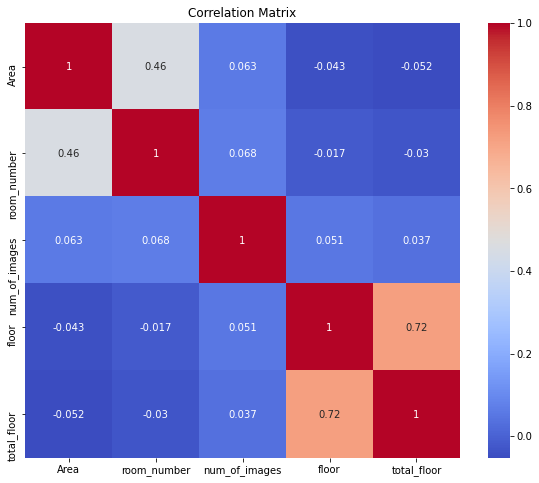

                   Area  room_number  num_of_images     floor  total_floor
Area           1.000000     0.455449       0.062590 -0.042685    -0.052295
room_number    0.455449     1.000000       0.068287 -0.017416    -0.030326
num_of_images  0.062590     0.068287       1.000000  0.051279     0.037076
floor         -0.042685    -0.017416       0.051279  1.000000     0.721151
total_floor   -0.052295    -0.030326       0.037076  0.721151     1.000000


In [86]:
# Select numerical columns excluding binary variables
numerical_columns = ['Area', 'room_number','num_of_images', 'floor', 'total_floor']

# Compute correlation matrix
correlation_matrix = data_copy[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Print correlation coefficients
print(correlation_matrix)

זיהינו קורולציה בין עמודת הקומה לעמודת סך כל הקומות ולכן כדי לא לאבד את כל הנתונים כי אלו עמודות חשובות ניצור עמודת יחס בין קומה לסך כל הקומה

In [87]:
data_copy['floor_ratio'] = data_copy['floor'] / data_copy['total_floor']
data_copy = data_copy.drop(['floor','total_floor'],axis =1)

בנוסף זאת פעולה שנוסיף לפיפליין כדי ליצור אחידות מידע

נבצע מבחן 
vif

In [88]:
#remove inf values
data_copy = data_copy[np.isfinite(data_copy['floor_ratio']) == True]
print(data_copy.shape)

vif_data = pd.DataFrame()
numerical_columns = ['Area','room_number','num_of_images','floor_ratio']
# data1['floor_ratio'] = pd.to_numeric(data1['floor_ratio'], errors='coerce')
vif_data['Feature'] = numerical_columns

# Check and convert data types if needed
data_copy[numerical_columns] = data_copy[numerical_columns].astype(float).copy()
 
data_cleaned = data_copy.dropna(subset=numerical_columns)  # Remove rows with missing values

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(data_cleaned[numerical_columns].values, i) for i in range(len(numerical_columns))]

# Print VIF values
print(vif_data)

(669, 24)
         Feature       VIF
0           Area  4.027758
1    room_number  5.548310
2  num_of_images  2.239254
3    floor_ratio  2.124433


אמנם מספר חדרים קיבל מספר גבוהה אבל זה פיצ'ר חשוב מידי כדי לוותר עליו